In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Metrail+dataset.csv')
data.columns = ['Month','Travellers']
data.head(12)

,Month,Travellers
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN
5,Jun-91,1879.0
6,Jul-91,1957.0
7,Aug-91,2027.0
8,Sep-91,1609.0
9,Oct-91,1740.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
Month         159 non-null object
Travellers    148 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [4]:
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
data = data.set_index('Month')
data.head(12)

,Travellers
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN
1991-06-01,1879.0
1991-07-01,1957.0
1991-08-01,2027.0
1991-09-01,1609.0


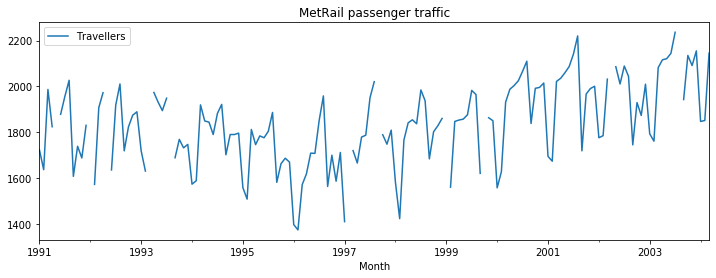

In [5]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('MetRail passenger traffic')
plt.show(block=False)

### Missing Value Imputation with Last observed value

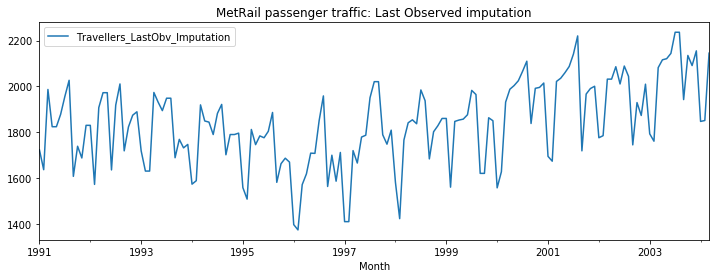

In [6]:
data = data.assign(Travellers_LastObv_Imputation=data.Travellers.fillna(method='pad'))
data[['Travellers_LastObv_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('MetRail passenger traffic: Last Observed imputation')
plt.show(block=False)

In [7]:
data.Travellers_LastObv_Imputation.mean()

1838.685534591195

### Missing Value Imputation with Next observed value

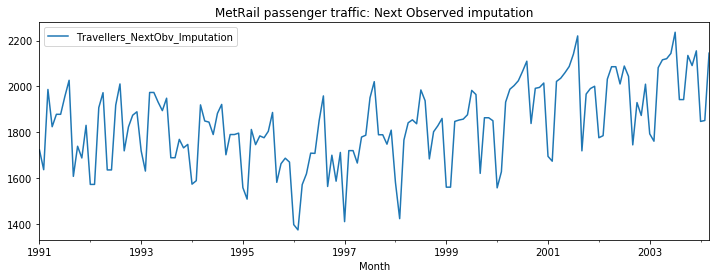

In [8]:
data = data.assign(Travellers_NextObv_Imputation=data.Travellers.fillna(method='bfill'))
data[['Travellers_NextObv_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('MetRail passenger traffic: Next Observed imputation')
plt.show(block=False)

In [9]:
data.Travellers_NextObv_Imputation.mean()

1834.446540880503

### Missing Value Imputation with Linear Interpolation value

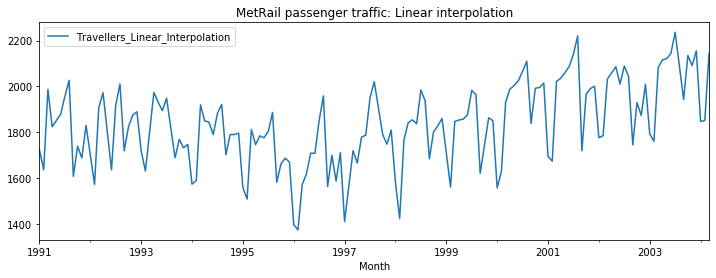

In [10]:
data = data.assign(Travellers_Linear_Interpolation=data.Travellers.interpolate(method='linear'))
data[['Travellers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('MetRail passenger traffic: Linear interpolation')
plt.show(block=False)

In [11]:
data.Travellers_Linear_Interpolation.mean()

1836.566037735849

### Use linear interpolation to impute missing values

In [12]:
data['Travellers'] = data['Travellers_Linear_Interpolation']
data.drop(columns=['Travellers_NextObv_Imputation','Travellers_LastObv_Imputation','Travellers_Linear_Interpolation'],inplace=True)

## Outlier Detection

### Box plot and interquartile range

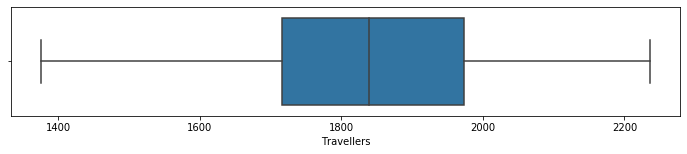

In [13]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Travellers'],whis=1.5)

### Histogram plot

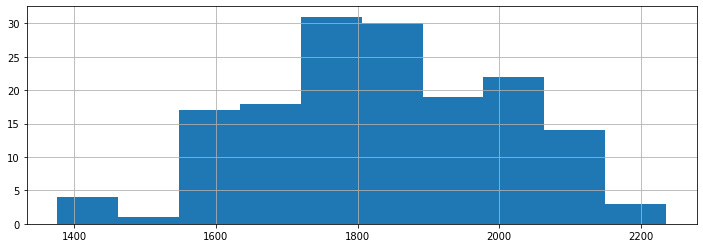

In [14]:
fig = data.Travellers.hist(figsize = (12,4))

## Time series Decomposition

### Additive seasonal decomposition

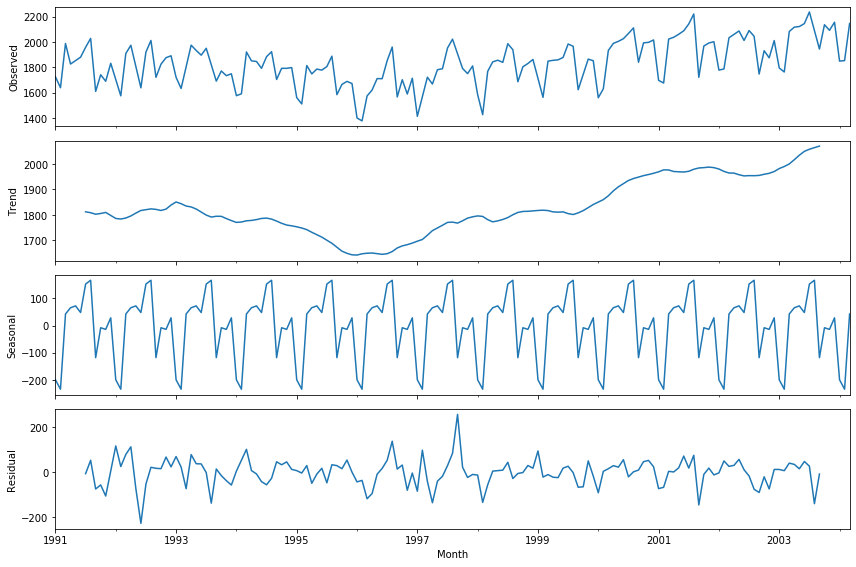

In [15]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Travellers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

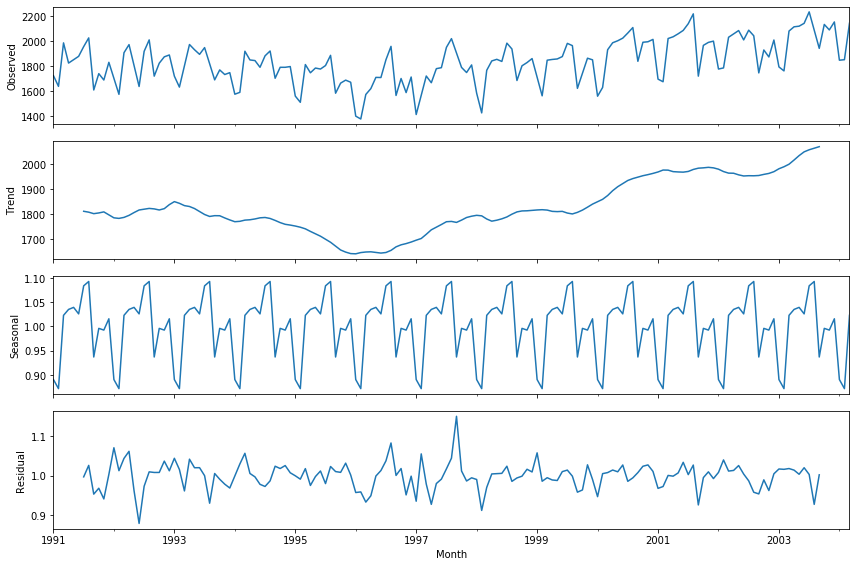

In [16]:
decomposition = sm.tsa.seasonal_decompose(data.Travellers, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

### Build and evaluate time series forecast  
  
#### Split time series data into training and test set

In [17]:
train_len = 120
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 39 months as out-of-time test set

### Simple time series methods  
  
#### Naive method

In [18]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Travellers'][train_len-1]

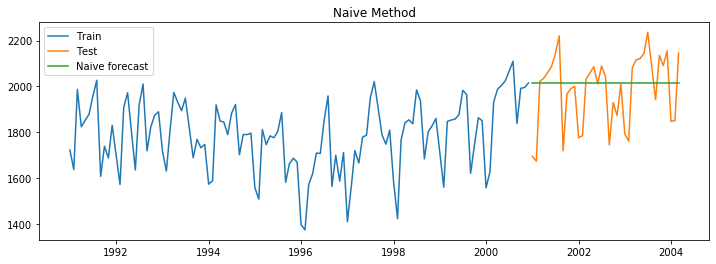

In [19]:
#Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Travellers'], label='Train')
plt.plot(test['Travellers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [20]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Travellers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Travellers']-y_hat_naive['naive_forecast'])/test['Travellers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,153.7,6.42


#### Simple average method

In [21]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Travellers'].mean()

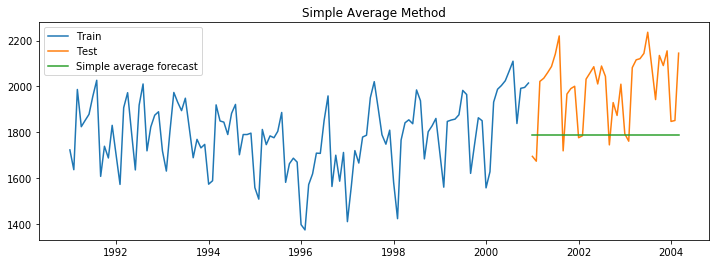

In [22]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Travellers'], label='Train')
plt.plot(test['Travellers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [23]:
rmse = np.sqrt(mean_squared_error(test['Travellers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Travellers']-y_hat_avg['avg_forecast'])/test['Travellers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,153.70,6.42
0,Simple average method,252.55,10.65


### Simple moving average method

In [24]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Travellers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

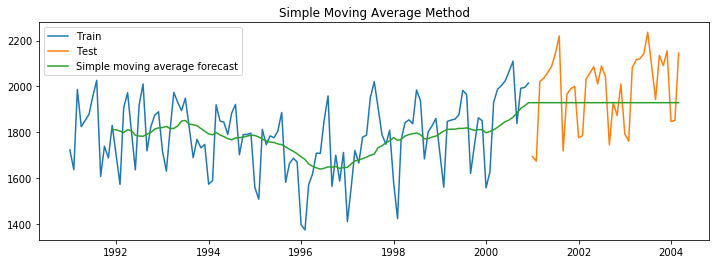

In [25]:
# plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Travellers'], label='Train')
plt.plot(test['Travellers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [26]:
rmse = np.sqrt(mean_squared_error(test['Travellers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Travellers']-y_hat_sma['sma_forecast'][train_len:])/test['Travellers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,153.70,6.42
0,Simple average method,252.55,10.65
0,Simple moving average forecast,162.76,7.37


## Exponential smoothing methods  
  
### Simple exponential smoothing

In [54]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Travellers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(39)

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


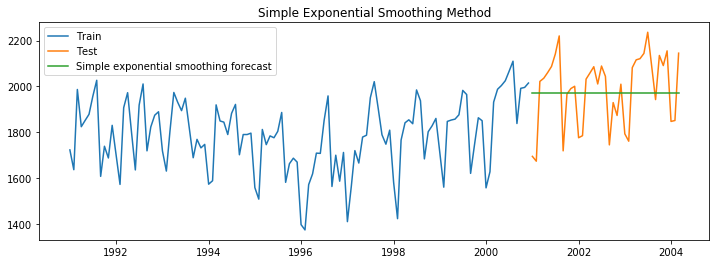

In [55]:
# plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Travellers'], label='Train')
plt.plot(test['Travellers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [56]:
y_hat_ses['ses_forecast'].head()

Month
2001-01-01    1969.85966
2001-02-01    1969.85966
2001-03-01    1969.85966
2001-04-01    1969.85966
2001-05-01    1969.85966
Name: ses_forecast, dtype: float64

In [57]:
rmse = np.sqrt(mean_squared_error(test['Travellers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Travellers']-y_hat_ses['ses_forecast'])/test['Travellers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,153.70,6.42
0,Simple average method,252.55,10.65
0,Simple moving average forecast,162.76,7.37
0,Simple exponential smoothing forecast,152.71,6.79


### Holt's method with trend

In [92]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Travellers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.03, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.03, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 1724.0, 'initial_slope': -86.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


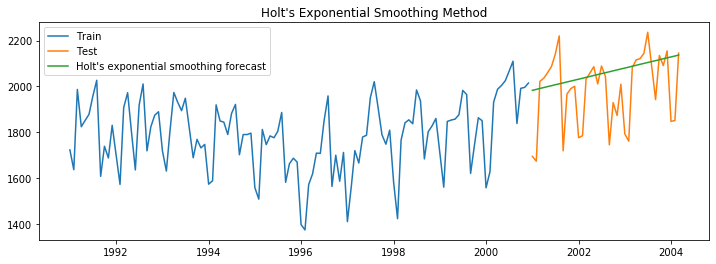

In [93]:
# plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Travellers'], label='Train')
plt.plot(test['Travellers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [91]:
rmse = np.sqrt(mean_squared_error(test['Travellers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Travellers']-y_hat_holt['holt_forecast'])/test['Travellers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,153.70,6.42
0,Simple average method,252.55,10.65
0,Simple moving average forecast,162.76,7.37
0,Simple exponential smoothing forecast,152.71,6.79
0,Holt's exponential smoothing method,163.09,6.36
0,Holt's exponential smoothing method,170.28,6.56


## Exchange Rate TWI Time series forecasting

In [67]:
edata = pd.read_csv('exchange-rate-twi.csv')
edata.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [70]:
edata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
Month                304 non-null int64
Exchange Rate TWI    304 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB


In [71]:
edata = edata.set_index('Month')
edata.head(12)

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2
6,99.2
7,99.2
8,99.3
9,100.0


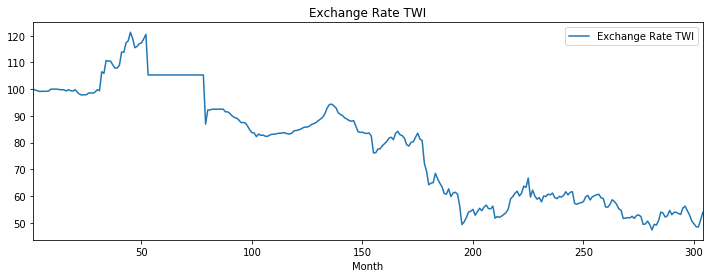

In [36]:
edata.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Exchange Rate TWI')
plt.show(block=False)

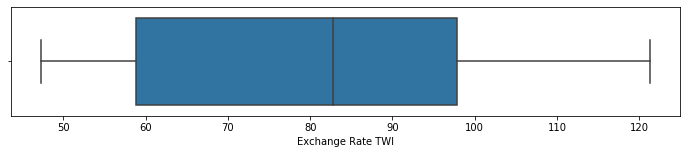

In [37]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=edata['Exchange Rate TWI'],whis=1.5)

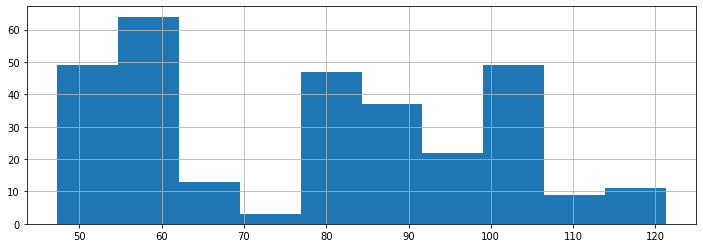

In [38]:
fig = edata['Exchange Rate TWI'].hist(figsize = (12,4))

No missing values or outliers detected. Hence, can conclude the dataset is clean

### Train-Test split

In [39]:
train_ln = 212
etrain = edata[0:train_ln] # first 212 months as training set
etest = edata[train_ln:] # last 92 months as out-of-time test set

In [40]:
y_ht_avg = etest.copy()
y_ht_avg['avg_forecast'] = etrain['Exchange Rate TWI'].mean()

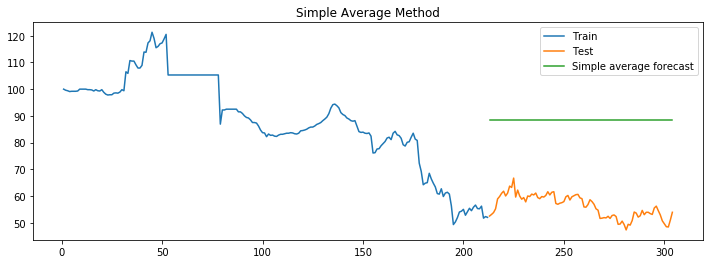

In [41]:
# Plot train, test and forecast 
plt.figure(figsize=(12,4))
plt.plot(etrain['Exchange Rate TWI'], label='Train')
plt.plot(etest['Exchange Rate TWI'], label='Test')
plt.plot(y_ht_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [42]:
rmse = np.sqrt(mean_squared_error(etest['Exchange Rate TWI'], y_ht_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(etest['Exchange Rate TWI']-y_ht_avg['avg_forecast'])/etest['Exchange Rate TWI'])*100,2)

eresults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
eresults = eresults[['Method', 'RMSE', 'MAPE']]
eresults

,Method,RMSE,MAPE
0,Simple average method,32.42,58.12


In [43]:
y_ht_avg['avg_forecast'].head(1)

Month
213    88.325472
Name: avg_forecast, dtype: float64

In [44]:
y_ht_naive = etest.copy()
y_ht_naive['naive_forecast'] = etrain['Exchange Rate TWI'][train_ln]

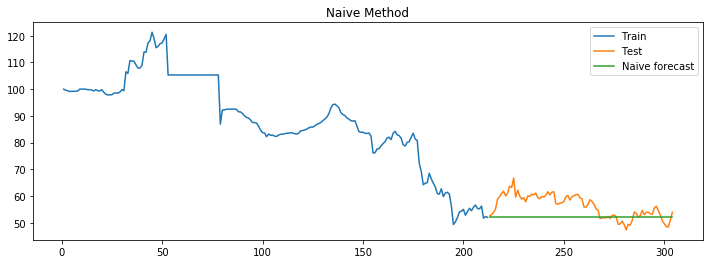

In [45]:
# Plot train, test and forecast 
plt.figure(figsize=(12,4))
plt.plot(etrain['Exchange Rate TWI'], label='Train')
plt.plot(etest['Exchange Rate TWI'], label='Test')
plt.plot(y_ht_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [46]:
rmse = np.sqrt(mean_squared_error(etest['Exchange Rate TWI'], y_ht_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(etest['Exchange Rate TWI']-y_ht_naive['naive_forecast'])/etest['Exchange Rate TWI'])*100,2)

etempresults = pd.DataFrame({'Method':['Naive method'], 'RMSE': [rmse],'MAPE': [mape] })
eresults = pd.concat([eresults, etempresults])
eresults = eresults[['Method', 'RMSE', 'MAPE']]
eresults

,Method,RMSE,MAPE
0,Simple average method,32.42,58.12
0,Naive method,5.98,8.41


In [47]:
y_ht_naive['naive_forecast'].head()

Month
213    52.0
214    52.0
215    52.0
216    52.0
217    52.0
Name: naive_forecast, dtype: float64

In [48]:
etrain['Exchange Rate TWI'].tail(1)

Month
212    52.0
Name: Exchange Rate TWI, dtype: float64

In [49]:
y_ht_sma = edata.copy()
ma_window = 6
y_ht_sma['sma_forecast'] = edata['Exchange Rate TWI'].rolling(ma_window).mean()
y_ht_sma['sma_forecast'][train_ln:] = y_ht_sma['sma_forecast'][train_ln-1]

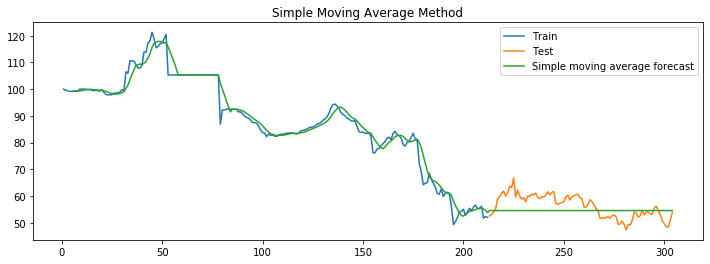

In [50]:
# plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(etrain['Exchange Rate TWI'], label='Train')
plt.plot(etest['Exchange Rate TWI'], label='Test')
plt.plot(y_ht_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [51]:
rmse = np.sqrt(mean_squared_error(etest['Exchange Rate TWI'], y_ht_sma['sma_forecast'][train_ln:])).round(2)
mape = np.round(np.mean(np.abs(etest['Exchange Rate TWI']-y_ht_sma['sma_forecast'][train_ln:])/etest['Exchange Rate TWI'])*100,2)

etempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
eresults = pd.concat([eresults, etempResults])
eresults = eresults[['Method', 'RMSE', 'MAPE']]
eresults

,Method,RMSE,MAPE
0,Simple average method,32.42,58.12
0,Naive method,5.98,8.41
0,Simple moving average forecast,4.58,6.90


In [52]:
y_ht_sma['sma_forecast'][train_ln:].head()

Month
213    54.55
214    54.55
215    54.55
216    54.55
217    54.55
Name: sma_forecast, dtype: float64